In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../../data/interim/gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


- dropping preice_per_sqft and society because we are not going to ask this to user in predicted model.


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


- we have to find the relationship of each column to price column

### luxury score

- discritization of luxury score

<Axes: ylabel='luxury_score'>

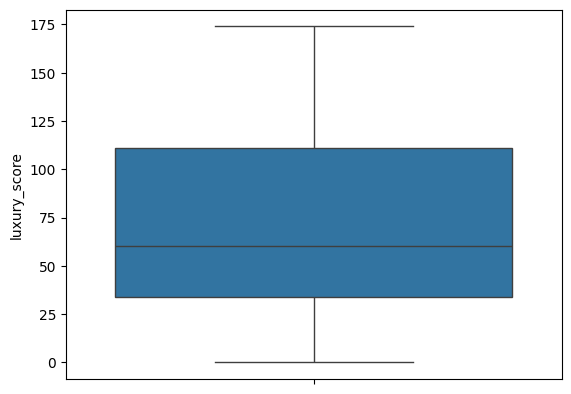

In [8]:
sns.boxplot(df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,High
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,High


### floorNum

- discritization of floorNum

<Axes: ylabel='floorNum'>

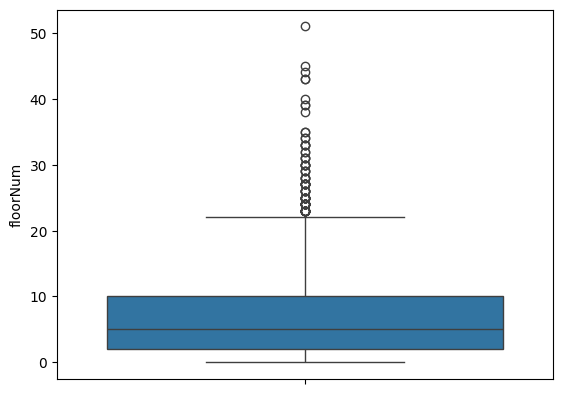

In [12]:
sns.boxplot(df['floorNum'])

In [13]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [14]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [15]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,High,Mid Floor


In [16]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,High,Mid Floor


### Feature Selection

- appling OE because we are not going to use linear models

In [18]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [19]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0


In [20]:
y_label

0        0.82
1        0.95
2        0.32
3        1.60
4        0.48
        ...  
3549     0.37
3550     6.00
3551     0.60
3552    15.50
3553     1.78
Name: price, Length: 3554, dtype: float64

We are going to apply 8 feature seleciton techniques
<br>
for every techneaque will give each feature a score, and in the end we will do the avg of that score.
<br>
whicherever feature have the high score we will select those.

### Technique 1 - Correlation Analysis

<Axes: >

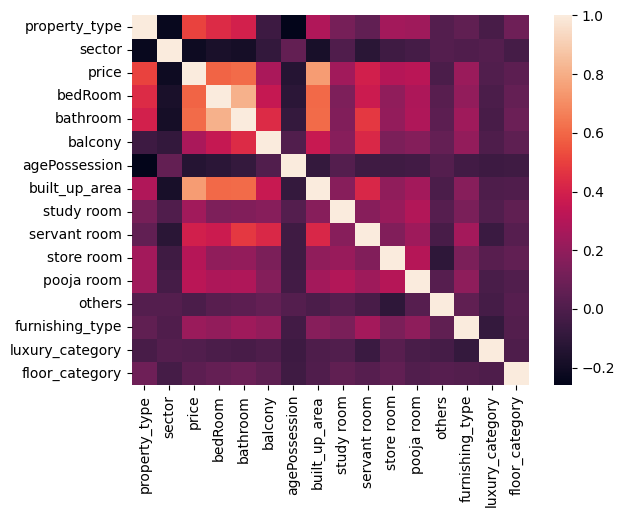

In [21]:
 sns.heatmap(data_label_encoded.corr())

In [22]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.212084
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.134171
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


### Technique 2 - Random Forest Feature Importance

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.650289
1,sector,0.102677
0,property_type,0.100063
3,bathroom,0.026261
2,bedRoom,0.023684
8,servant room,0.019175
5,agePossession,0.014153
4,balcony,0.012517
12,furnishing_type,0.010546
7,study room,0.008449


### Technique 3 - Gradient Boosting Feature importances

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.677834
1,sector,0.102750
0,property_type,0.098426
2,bedRoom,0.038321
3,bathroom,0.035826
8,servant room,0.023296
9,store room,0.010356
5,agePossession,0.004173
7,study room,0.003156
12,furnishing_type,0.002649


### Technique 4 - Permutation Importance

In [25]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.734257
0,property_type,0.200330
1,sector,0.181350
8,servant room,0.020919
2,bedRoom,0.018152
3,bathroom,0.017923
5,agePossession,0.005787
9,store room,0.001377
14,floor_category,0.001327
4,balcony,0.001000


- -ve values represent when we removed these column the model score is increased

### Technique 5 - LASSO

trying linear model

In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.510173
0,property_type,0.713829
3,bathroom,0.275042
9,store room,0.199655
7,study room,0.171846
12,furnishing_type,0.164113
8,servant room,0.160601
10,pooja room,0.073845
13,luxury_category,0.055268
2,bedRoom,0.014170


- because we gave sectore ordinal encoding thats why it is in -ve otherwise sector is imp column

### Technique 6 - RFE

- one of the best feature selection tech

In [27]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.648004
1,sector,0.104548
0,property_type,0.100227
2,bedRoom,0.027056
3,bathroom,0.023621
8,servant room,0.019172
5,agePossession,0.014098
4,balcony,0.012420
12,furnishing_type,0.010015
7,study room,0.009365


### Technique 7 - Linear Regression Weights

(Not relable becuase liner model)

In [29]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.512629
0,property_type,0.712890
3,bathroom,0.281976
9,store room,0.204159
7,study room,0.180048
12,furnishing_type,0.173192
8,servant room,0.169605
10,pooja room,0.076893
13,luxury_category,0.066472
2,bedRoom,0.016790


### Technique 8 - SHAP

In [30]:
!pip install shap

     -------------------------------------- 456.1/456.1 kB 3.6 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


c:\Users\vijit_singh\Desktop\Personal projects repo\Estate-Radar\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[-0.18192036,  0.15424257, -0.03100486, ..., -0.01230752,
        -0.00440878, -0.00980847],
       [-0.19877192, -0.39460014, -0.04741698, ..., -0.01155457,
        -0.00452365, -0.00375597],
       [-0.17665503, -0.41851647, -0.04437704, ..., -0.01430941,
        -0.01258135, -0.01538631],
       ...,
       [-0.18745324,  0.06853302, -0.00554452, ...,  0.00607074,
         0.01584493, -0.00433563],
       [ 1.50179072,  1.00348981,  0.36690439, ...,  0.0983194 ,
         0.04581282,  0.04671549],
       [-0.31206055,  0.01944403, -0.02195757, ...,  0.00709531,
        -0.00763894,  0.03397893]])

In [32]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.255228
0,property_type,0.472561
1,sector,0.383193
3,bathroom,0.112949
8,servant room,0.095049
2,bedRoom,0.049834
4,balcony,0.040485
12,furnishing_type,0.027753
5,agePossession,0.027457
14,floor_category,0.024946


In [33]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [34]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.212084,0.102677,0.102750,0.181350,-0.069634,0.104548,-0.078657,0.383193
bedRoom,0.591289,0.023684,0.038321,0.018152,0.014170,0.027056,0.016790,0.049834
bathroom,0.609777,0.026261,0.035826,0.017923,0.275042,0.023621,0.281976,0.112949
balcony,0.269637,0.012517,0.001849,0.001000,-0.043562,0.012420,-0.066353,0.040485
agePossession,-0.134171,0.014153,0.004173,0.005787,-0.000000,0.014098,-0.002041,0.027457
built_up_area,0.748574,0.650289,0.677834,0.734257,1.510173,0.648004,1.512629,1.255228
study room,0.242955,0.008449,0.003156,-0.018108,0.171846,0.009365,0.180048,0.019305
servant room,0.391930,0.019175,0.023296,0.020919,0.160601,0.019172,0.169605,0.095049
store room,0.305677,0.008445,0.010356,0.001377,0.199655,0.008586,0.204159,0.017097


In [35]:
# Compute modulos for each column in final_fi_df
final_fi_df_abs = final_fi_df.copy()
final_fi_df_abs['corr_coeff'] = final_fi_df_abs['corr_coeff'].abs()
final_fi_df_abs['lasso_coeff'] = final_fi_df_abs['lasso_coeff'].abs()
final_fi_df_abs['reg_coeffs'] = final_fi_df_abs['reg_coeffs'].abs()

In [36]:
final_fi_df_abs = final_fi_df_abs.divide(final_fi_df_abs.sum(axis=0), axis=1)

In [40]:
final_fi_df_abs

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,0.051512,0.114093,0.113967,0.190217,0.025251,0.116193,0.027431,0.183518
bedRoom,0.143615,0.026317,0.042504,0.019040,0.005138,0.030070,0.005855,0.023866
bathroom,0.148106,0.029181,0.039738,0.018800,0.099737,0.026253,0.098337,0.054093
balcony,0.065491,0.013909,0.002051,0.001049,0.015797,0.013803,0.023140,0.019389
agePossession,0.032588,0.015726,0.004628,0.006070,0.000000,0.015669,0.000712,0.013149
built_up_area,0.181818,0.722593,0.751834,0.770156,0.547624,0.720186,0.527517,0.601150
study room,0.059010,0.009388,0.003501,-0.018993,0.062315,0.010408,0.062790,0.009245
servant room,0.095194,0.021307,0.025839,0.021942,0.058237,0.021308,0.059148,0.045521
store room,0.074244,0.009384,0.011487,0.001445,0.072399,0.009543,0.071199,0.008188


In [41]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.062405,0.114093,0.113967,0.190217,-0.027946,0.116193,-0.031512,0.183518
bedRoom,0.173984,0.026317,0.042504,0.019040,0.005687,0.030070,0.006727,0.023866
bathroom,0.179424,0.029181,0.039738,0.018800,0.110381,0.026253,0.112968,0.054093
balcony,0.079339,0.013909,0.002051,0.001049,-0.017483,0.013803,-0.026583,0.019389
agePossession,-0.039479,0.015726,0.004628,0.006070,-0.000000,0.015669,-0.000818,0.013149
built_up_area,0.220264,0.722593,0.751834,0.770156,0.606071,0.720186,0.606003,0.601150
study room,0.071488,0.009388,0.003501,-0.018993,0.068966,0.010408,0.072132,0.009245
servant room,0.115324,0.021307,0.025839,0.021942,0.064453,0.021308,0.067949,0.045521
store room,0.089944,0.009384,0.011487,0.001445,0.080126,0.009543,0.081792,0.008188


In [37]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [42]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.062405,0.114093,0.113967,0.190217,-0.027946,0.116193,-0.031512,0.183518
bedRoom,0.173984,0.026317,0.042504,0.019040,0.005687,0.030070,0.006727,0.023866
bathroom,0.179424,0.029181,0.039738,0.018800,0.110381,0.026253,0.112968,0.054093
balcony,0.079339,0.013909,0.002051,0.001049,-0.017483,0.013803,-0.026583,0.019389
agePossession,-0.039479,0.015726,0.004628,0.006070,-0.000000,0.015669,-0.000818,0.013149
built_up_area,0.220264,0.722593,0.751834,0.770156,0.606071,0.720186,0.606003,0.601150
study room,0.071488,0.009388,0.003501,-0.018993,0.068966,0.010408,0.072132,0.009245
servant room,0.115324,0.021307,0.025839,0.021942,0.064453,0.021308,0.067949,0.045521
store room,0.089944,0.009384,0.011487,0.001445,0.080126,0.009543,0.081792,0.008188


In [43]:
final_fi_df_abs

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,0.051512,0.114093,0.113967,0.190217,0.025251,0.116193,0.027431,0.183518
bedRoom,0.143615,0.026317,0.042504,0.019040,0.005138,0.030070,0.005855,0.023866
bathroom,0.148106,0.029181,0.039738,0.018800,0.099737,0.026253,0.098337,0.054093
balcony,0.065491,0.013909,0.002051,0.001049,0.015797,0.013803,0.023140,0.019389
agePossession,0.032588,0.015726,0.004628,0.006070,0.000000,0.015669,0.000712,0.013149
built_up_area,0.181818,0.722593,0.751834,0.770156,0.547624,0.720186,0.527517,0.601150
study room,0.059010,0.009388,0.003501,-0.018993,0.062315,0.010408,0.062790,0.009245
servant room,0.095194,0.021307,0.025839,0.021942,0.058237,0.021308,0.059148,0.045521
store room,0.074244,0.009384,0.011487,0.001445,0.072399,0.009543,0.071199,0.008188


In [46]:
final_fi_df_abs.mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.602860
sector             0.102773
bathroom           0.064281
servant room       0.043562
bedRoom            0.037051
store room         0.032236
furnishing_type    0.025239
study room         0.024708
balcony            0.019329
pooja room         0.018898
agePossession      0.011068
luxury_category    0.008787
floor_category     0.005543
others             0.003667
dtype: float64

In [47]:
final_fi_df.mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.624782
sector             0.074516
bathroom           0.071355
servant room       0.047955
bedRoom            0.041024
store room         0.036489
furnishing_type    0.028605
study room         0.028267
pooja room         0.021807
balcony            0.010684
luxury_category    0.009548
floor_category     0.004305
agePossession      0.001868
others            -0.001205
dtype: float64

- considering only non linear models score

In [ ]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.713184
sector             0.143598
bathroom           0.033613
bedRoom            0.028359
servant room       0.027183
agePossession      0.011048
balcony            0.010040
store room         0.008009
floor_category     0.005662
furnishing_type    0.005441
luxury_category    0.004939
pooja room         0.003980
study room         0.002710
others             0.002234
dtype: float64

- pooja room, study room, others seems to be not important, first we have to proove that there is no loss after removing them.
- first we well train rf on entire data, then again we will train rf after removing these three columns.

In [324]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0


In [325]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [326]:
scores.mean()

0.8193190510339333

In [327]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [276]:
scores.mean()

0.8196500940616491

- we can drop these columns

In [278]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [280]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [348]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0,36,3.0,2.0,2,1,850.0,0.0,0.0,0.0,1,1,0.82
1,0,95,2.0,2.0,2,1,1226.0,1.0,0.0,0.0,1,2,0.95
2,0,103,2.0,2.0,1,1,1000.0,0.0,0.0,0.0,1,0,0.32
3,0,99,3.0,4.0,4,3,1615.0,1.0,0.0,1.0,0,2,1.60
4,0,5,2.0,2.0,1,3,582.0,0.0,1.0,0.0,0,2,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0,90,2.0,2.0,1,3,532.0,0.0,0.0,0.0,2,2,0.37
3550,1,12,5.0,5.0,4,3,6228.0,1.0,1.0,0.0,0,1,6.00
3551,0,23,1.0,1.0,1,0,665.0,0.0,0.0,1.0,2,2,0.60
3552,1,44,5.0,6.0,3,0,5490.0,1.0,1.0,0.0,2,2,15.50
